
## TP 3 : Sods Shock Tube.

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Pour ce 3ème travail personnel nous allons nous intéresser au problème du "tube à chocs". 

Brièvement, il s'agit d'un tube contenant un gaz et séparé en 2 régions par un diaphragme infiniment mince. Le gaz contenu dans ces deux régions étant initialement à des pressions différentes, la rupture instantanée du diaphragme aura pour conséquence de généré une onde de choc (à 1 dimension) à l'intérieur du tube. 

L'objectif de ce travail personnel est alors de calculer la pression, la densité et la vitesse du gaz compressible au travers du tube à chocs et ce pour un instant qui succède la rupture du diaphragme. Pour se faire nous utiliserons la méthode de Richtmyer introduite dans la partie théorique de l'énoncé de ce travail personnel.

---
##### 1. Rappel & développement théorique:

---

#### 1.1 Les équations d'Euler.
---

Comme annoncé dans l'énoncé du problème, les équations d'Euler gouverne le mouvement d'un fluide non-visqueux. Par conséquent elles vont nous permettrent de décrire l'écoullement à 1 dimension du gaz dans le tube à chocs lorsque le diaphragme est rompu.

Les équations d'Euler sont ainsi constituées des équations suivantes :

$$
\left\{
    \begin{array}{lll}
        &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 & \mbox{(conservation de la masse)}\\
        &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 & \mbox{(conservation de la QDM)}\\
        &\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)= 0 & \mbox{(conservation de l'énergie)}
    \end{array}
\right.
$$

où 

$$
    \begin{array}{ll}
        \mbox{QDM signifie "quantité de mouvements"}\\
        e_T = e+u^2/2 \mbox{, est l'énergie totale par unité de masse}\\
        \rho \mbox{, est la ddensité du fluide}\\
        u \mbox{, est la vitesse du fluide}\\
        p \mbox{, est la pression du fluide}\\
    \end{array}
$$

Les équations d'Euler, sous la forme conservative (fournissant des résultats plus précis), peuvent alors être écritent sous forme vectorielle comme suit :


\begin{equation}
\frac{\partial }{\partial t} \overline{\mathbf{u}} + \frac{\partial }{\partial x} \overline{\mathbf{f}} = 0
\end{equation}
avec $\overline{\mathbf{u}}$ le vecteur des variables conservées et $\overline{\mathbf{f}}$ le vecteur de flux, donnés par :

\begin{align}
\overline{\mathbf{u}} & = \begin{pmatrix} \rho \\ \rho u \\ \rho e_T \end{pmatrix} & \overline{\mathbf{f}} & = \begin{pmatrix} \rho u \\ \rho u^2 + p \\ (\rho e_T + p) u  \end{pmatrix}.
\end{align}

Mais comme on à put le remarquer nous disposons ici de 3 équations pour 4 inconnues. En introduisant alors l'équation d'état qu'est l'équation des gaz idéaux, nous pouvons obtenir une équation supplémentaire avec l'équation pour la pression suivante :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}
où $\gamma^{1} = 1.4$

En outre, en exprimant la pression en terme du vecteur des variables conservées $\overline{\mathbf{u}}$ :

$$p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)$$

et en remarquant que $\overline{\mathbf{f}}$ est une fonction de $\overline{\mathbf{u}}$ et que nous pouvons alors également exprimer $\overline{\mathbf{f}}$ en terme de $$ \overline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$,


$$→ \overline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

qui est facilement résolvable.

In [9]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [46]:
nx = 81
dx = .25
dt = .0002
gamma = 1.4

x = numpy.linspace(-10,10,nx)

In [73]:
rho_L = 1
rho_R = .125
u_L   = 0
u_R   = 0
p_L   = 100
p_R   = 10

expli u3 est la pression au temps t = 0

In [102]:
def condition_ini(nx, rho_L, rho_R, u_L, u_R, p_L, p_R):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Nombre de point de la grille en x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    
    x1 = numpy.ones(nx)
    
    u1 = x1*rho_L                      # densité à gauche du diaphragme
    u1[int((nx-1)/2):] = rho_R         # densité à droite du diaphragme
    u2 = x1*u_L                        # vitesse à gauche du diaphragme
    u2[int((nx-1)/2):] = u_R           # vitesse à droite du diaphragme
    u3 = x1*p_L                        # pression à gauche du diaphragme
    u3[int((nx-1)/2):] = p_R           # pression à droite du diaphragme
    
    pyplot.subplot(211)
    pyplot.plot(x, u1, "b-", linewidth=1)
    pyplot.ylabel('Densité $(kg/m^{3})$')
    pyplot.xlabel('position $(m)$')
    pyplot.ylim(0,1.2)

    pyplot.subplot(212)
    pyplot.plot(x, u2, "b-", linewidth=1)
    pyplot.ylabel('vitesse $(m/s)$')
    pyplot.xlabel('position $(m)$')
    
    #pyplot.subplot(213)
    #pyplot.plot(x, u3, "b-", linewidth=1)
    #pyplot.ylabel('pression $(kN/m^{2})')
    #pyplot.xlabel('position $(m)$')

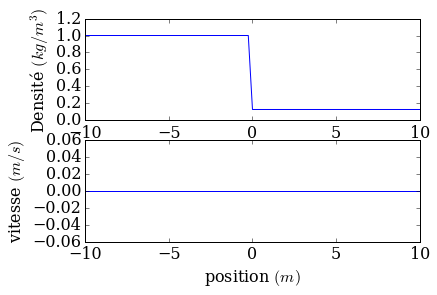

In [103]:
condition_ini(nx, rho_L, rho_R, u_L, u_R, p_L, p_R)

In [ ]:
x = numpy.linspace(0,4,nx)


if x<0:
    p=10
    u1=1
    u2=0
    u3=(p/(gamma-1))+1/2*u2^2/u1
else:
    p=100
    u1=0.125
    u2=0
    u3=(p/(gamma-1))+1/2*u2^2/u1    
    
print(u3)

In [ ]:
rho =
u   = 
e_t =


u = numpy.empty((nt,3))
u = numpy.array([rho,rho*u,rho*e_T])




In [ ]:
def flux(u):

    """Calcul du vecteur flux

    Paramètres
    ----------
    u1  : float
        rho
    u2  : float
        rho*u
    u3  : float
        rho*e_T
        
    Returns
    -------
        F : tableau
        tableau avec le vecteur flux pour tout point x
    """
    
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
    
    return numpy.array([u2,(u2**2/u1)+(gamma-1)*(u3-0.5*(u2**2/u1)),\\
                        (u3+((gamma-1)*(u3-0.5*(u2**2/u1))))*(u2/u1)])

In [ ]:
def maccormack(rho, nt, dt, dx, u_max, rho_max):
    """ Computes the solution with MacCormack scheme
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    rho_n = numpy.zeros((nt,len(rho)))
    rho_star = numpy.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1,nt):
        F = flux(u_max, rho_max, rho)
        u_star[:-1] = rho[:-1] - dt/dx * (F[1:]-F[:-1])
        Fstar = flux(u_max, rho_max, u_star)
        rho_n[t,1:] = .5 * (rho[1:]+rho_star[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        rho = rho_n[t].copy()
        
    return rho_n

In [ ]:
def maccormack(rho, nt, dt, dx, u_max, rho_max):
    """ Computes the solution with MacCormack scheme
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    rho_n = numpy.zeros((nt,len(rho)))
    rho_star = numpy.empty_like(rho)
    rho_n[:,:] = rho.copy()
    rho_star = rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_star[:-1] = rho[:-1] - dt/dx * (F[1:]-F[:-1])
        Fstar = computeF(u_max, rho_max, rho_star)
        rho_n[t,1:] = .5 * (rho[1:]+rho_star[1:] - dt/dx * (Fstar[1:] - Fstar[:-1]))
        rho = rho_n[t].copy()
        
    return rho_n

---
##### x. Sources:

---

---

###### The cell below loads the style of the notebook.

In [2]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())